# Multimodal Model

**Step 1: Import Libraries**

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import sklearn
import gc
import nltk
nltk.download('stopwords')

from gensim.models.keyedvectors import KeyedVectors
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from smart_open import open
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from keras.layers import Dropout
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Attention, TimeDistributed
from keras.layers import LSTM, TimeDistributed
from keras.layers import Dot, Activation, Flatten, Multiply, Permute, RepeatVector, Lambda, Softmax
from keras.layers import Layer, Reshape
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Concatenate, Dropout, Bidirectional
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Step 2: Import Text Data**

In [2]:
finalMatrix= np.load(file="/content/drive/My Drive/finalMatrix_1.npy")
text_Y= np.load(file="/content/drive/My Drive/text_Y_1.npy")
finalMatrix_test= np.load(file="/content/drive/My Drive/finalMatrix_test.npy")
text_Y_test= np.load(file="/content/drive/My Drive/text_Y_test.npy")

**Step 3: Import Audio Data**

In [6]:
X_upsample= np.load(file="/content/drive/My Drive/X_upsample_1.npy")
Y_upsample= np.load(file="/content/drive/My Drive/Y_upsample_1.npy")
X_test= np.load(file="/content/drive/My Drive/X_test.npy")
Y_test= np.load(file="/content/drive/My Drive/Y_test.npy")

**Step 4: multi-modal model**

In [7]:
class MultimodalModel:
    def __init__(self, inputA_shape, inputB_shape):
        self.inputA_shape = inputA_shape
        self.inputB_shape = inputB_shape
        self.model = self.create_model()

    class Attention(Layer):
        def __init__(self, return_sequences=True):
            self.return_sequences = return_sequences
            super().__init__()

        def build(self, input_shape):
            self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1), initializer="normal")
            self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1), initializer="zeros")
            super().build(input_shape)

        def call(self, x):
            e = K.tanh(K.dot(x,self.W)+self.b)
            a = K.softmax(e, axis=1)
            output = x*a
            if self.return_sequences:
                return output
            return K.sum(output, axis=1)

    def create_model(self):
        inputA = Input(shape=self.inputA_shape)
        inputB = Input(shape=self.inputB_shape)

        x = Conv1D(60, 10, activation='relu')(inputA)
        x = MaxPooling1D(pool_size = 3)(x)
        x = Conv1D(30, 5, activation = 'relu')(x)
        x = MaxPooling1D(pool_size = 3)(x)
        x = Conv1D(15, 5, activation = 'relu')(x)
        x = MaxPooling1D(pool_size = 3)(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = self.Attention(return_sequences=False)(x)  # Added Attention here
        x = Dense(units = 128, activation = 'relu')(x)
        modelA = Model(inputs=inputA, outputs=x)

        y = Conv2D(150, (1, 5), activation='relu', data_format="channels_last")(inputB)
        y = MaxPooling2D(pool_size = (1, 3))(y)
        y = Conv2D(75, (1, 3), activation = 'relu', data_format="channels_last")(y)
        y = MaxPooling2D(pool_size = (1, 2))(y)
        y = TimeDistributed(Flatten())(y)
        y = LSTM(128, return_sequences=True)(y)
        y = LSTM(64, return_sequences=True)(y)
        y = self.Attention(return_sequences=False)(y)
        y = Dense(units = 128, activation = 'relu')(y)
        modelB = Model(inputs=inputB, outputs=y)

        combined = Concatenate()([modelA.output, modelB.output])

        z = Dense(64, activation="relu")(combined)
        z = Dense(1, activation="sigmoid")(z)

        model = Model(inputs=[modelA.input, modelB.input], outputs=z)

        return model

    def compile(self, learning_rate):
        opt = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    def fit(self, X_A, X_B, Y, epochs=10, batch_size=32, verbose=1):
        return self.model.fit([X_A, X_B], Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    # def fit(self, X_A, X_B, Y, epochs=10, batch_size=32, verbose=1):
    #     self.model.fit([X_A, X_B], Y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    def evaluate(self, X_A, X_B, Y, verbose=1):
        return self.model.evaluate([X_A, X_B], Y, verbose=verbose)


    def predict(self, X_A, X_B):
        return self.model.predict([X_A, X_B])


mm_model = MultimodalModel((40000, 74), (finalMatrix.shape[1], finalMatrix.shape[2], finalMatrix.shape[3]))



**Step 5: Hyperparameter Tuning**

Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...
Fold 1...
Fold 2...
Fold 3...
Fold 4...
Fold 5...


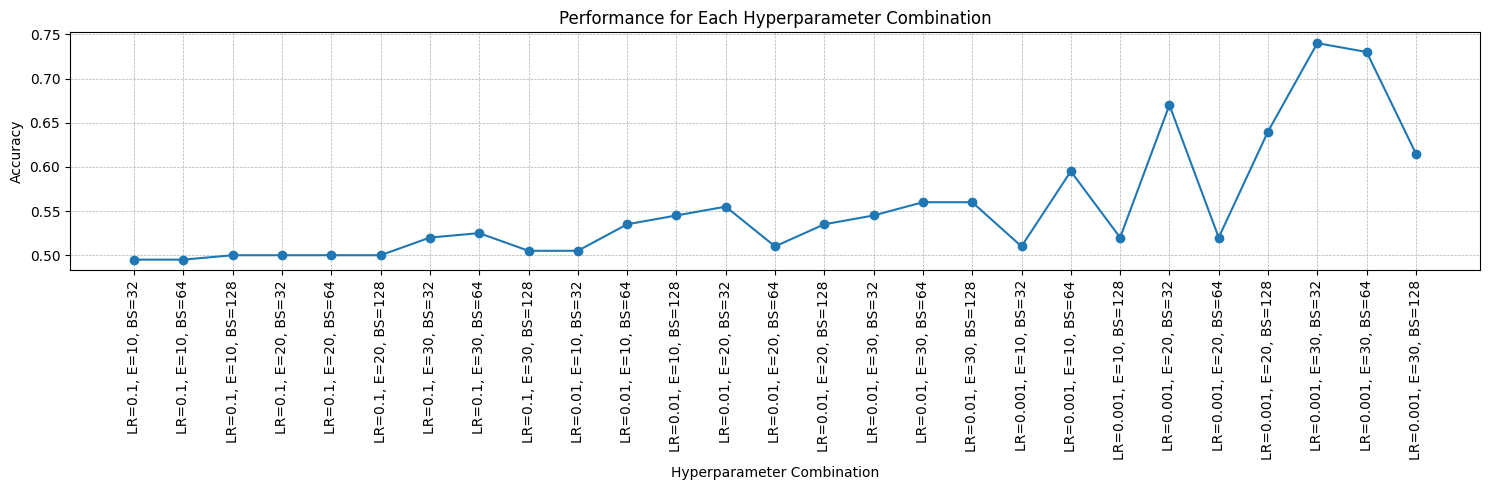

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Assume input data arrays are numpy arrays
X_A = np.array(X_upsample)  # Substitute your actual inputA data here
X_B = np.array(finalMatrix)  # Substitute your actual inputB data here
Y = np.array(text_Y)        # Substitute your actual labels data here

# Determine hyperparameter space
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True)

best_score = 0
best_params = None
all_params_labels = []
all_scores = []

for learning_rate in param_grid['learning_rate']:
    for epochs in param_grid['epochs']:
        for batch_size in param_grid['batch_size']:

            fold = 0
            accuracies = []

            for train, test in kfold.split(X_A, Y):   # Stratified based on Y
                fold += 1
                print(f"Fold {fold}...")

                X_A_train, X_A_val = X_A[train], X_A[test]
                X_B_train, X_B_val = X_B[train], X_B[test]
                Y_train, Y_val = Y[train], Y[test]

                inputA_shape = X_A_train.shape[1:]  # Shape of inputA excluding the batch dimension
                inputB_shape = X_B_train.shape[1:]  # Shape of inputB excluding the batch dimension

                model = MultimodalModel(inputA_shape, inputB_shape)
                model.compile(learning_rate=learning_rate)
                model.fit(X_A_train, X_B_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                _, accuracy = model.evaluate(X_A_val, X_B_val, Y_val, verbose=0)
                accuracies.append(accuracy)

            score = np.mean(accuracies)
            if score > best_score:
                best_score = score
                best_params = (learning_rate, epochs, batch_size)

            # Append results to lists for plotting
            all_params_labels.append(f"LR={learning_rate}, E={epochs}, BS={batch_size}")
            all_scores.append(score)

print(f"Best parameters are learning rate: {best_params[0]}, epochs: {best_params[1]}, batch_size: {best_params[2]}")

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(range(len(all_scores)), all_scores, marker='o', linestyle='-')
plt.xticks(range(len(all_params_labels)), all_params_labels, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.title('Performance for Each Hyperparameter Combination')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Step 6: Training and Testing**

Epoch 1/15
5/5 [==============================] - 7s 213ms/step - loss: 0.2562 - accuracy: 0.8944
Epoch 2/15
5/5 [==============================] - 1s 213ms/step - loss: 0.2335 - accuracy: 0.8944
Epoch 3/15
5/5 [==============================] - 1s 218ms/step - loss: 0.2909 - accuracy: 0.9366
Epoch 4/15
5/5 [==============================] - 1s 214ms/step - loss: 0.1468 - accuracy: 0.9507
Epoch 5/15
5/5 [==============================] - 1s 225ms/step - loss: 0.1480 - accuracy: 0.9577
Epoch 6/15
5/5 [==============================] - 1s 215ms/step - loss: 0.0952 - accuracy: 0.9718
Epoch 7/15
5/5 [==============================] - 1s 213ms/step - loss: 0.0951 - accuracy: 0.9648
Epoch 8/15
5/5 [==============================] - 1s 213ms/step - loss: 0.1888 - accuracy: 0.8944
Epoch 9/15
5/5 [==============================] - 1s 213ms/step - loss: 0.0764 - accuracy: 0.9859
Epoch 10/15
5/5 [==============================] - 1s 214ms/step - loss: 0.0448 - accuracy: 0.9859
Epoch 11/15
5/5 [==

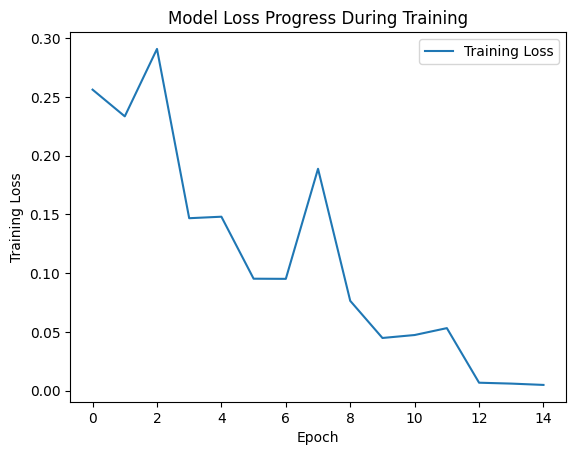

In [22]:

mm_model.compile(learning_rate=0.001)


history = mm_model.fit(X_upsample, finalMatrix, text_Y, epochs=15)

Y_pred = mm_model.predict(X_test, finalMatrix_test)

plt.plot(history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


In [3]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")
# F1-Score
f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score on test set: {f1:.2f}")

# Recall
recall = recall_score(Y_test, Y_pred)
print(f"Recall on test set: {recall:.2f}")

# Precision
precision = precision_score(Y_test, Y_pred)
print(f"Precision on test set: {precision:.2f}")

Accuracy on test set: 0.77
F1 Score on test set: 0.69
Recall on test set: 0.60
Precision on test set: 0.82
